# Прогнозирование удоя коров

## Описание проекта

Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия контракта позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям.

**Описание данных**

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.

    "id" — уникальный идентификатор коровы.
    "Удой, кг" — масса молока, которую корова даёт в год (в килограммах).
    "ЭКЕ (Энергетическая кормовая единица)" — показатель питательности корма коровы.
    "Сырой протеин, г" — содержание сырого протеина в корме (в граммах).
    "СПО (Сахаро-протеиновое соотношение)" — отношение сахара к протеину в корме коровы.
    "Порода" — порода коровы.
    "Тип пастбища" — ландшафт лугов, на которых паслась корова.
    "порода папы_быка" — порода папы коровы.
    "Жирность,%" — содержание жиров в молоке (в процентах).
    "Белок,%" — содержание белков в молоке (в процентах).
    "Вкус молока" — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    "Возраст" — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.

    "id" — уникальный идентификатор коровы.
    "Имя Папы" — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

    "Порода" — порода коровы.
    "Тип пастбища" — ландшафт лугов, на которых паслась корова.
    "порода папы_быка" — порода папы коровы.
    "Имя_папы" — имя папы коровы.
    "Текущая_жирность,%" — содержание жиров в молоке (в процентах).
    "Текущий_уровень_белок,%" — содержание белков в молоке (в процентах).
    "Возраст" — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**Цель проекта**

Разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке.

Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:

    Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
    Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
    
С помощью модели нужно отобрать коров по двум критериям:

    средний удой за год — не менее 6000 килограммов;
    молоко должно быть вкусным.

**План работы**

    1. Загрузка данных
    2. Предобработка данных
    3. Исследовательский анализ данных
    4. Корреляционный анализ признаков в датасете ferma_main.csv
    5. Задача регрессии
    6. Задача классификации
    7. Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy import stats as st

Прочитаем файл 'ferma_main.csv' из папки /datasets, сохранив его в датафрейм ferma. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [2]:
#считываем файл ferma.csv и выводим первые пять строк на экран
ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';',decimal=',')
ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [3]:
# выводим общую информацию о ferma
ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Изучив общую информацию о датафрейме, можем сказать, что всего в таблице 634 строки и 12 столбцов. Названия столбцов не соответствуют "хорошему" стилю. В данных нет пропусков. Столбцы имеют верный тип данных.

Прочитаем файл 'ferma_dad.csv' из папки /datasets, сохранив его в датафрейм dads. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [4]:
# считываем файл ferma_dad.csv и выводим первые пять строк на экран
dads = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
dads.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
# выводим общую информацию о dads
dads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Изучив общую информацию о датафрейме, можем сказать, что всего в таблице 629 строк и 2 столбца. Название столбца *Имя Папы* не соответствуют "хорошему" стилю. В данных нет пропусков. Столбцы имеют верный тип данных.

Прочитаем файл 'cow_buy.csv' из папки /datasets, сохранив его в датафрейм cow_buy. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [6]:
# считываем файл cow_buy.csv и выводим датафрейм на экран
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';',decimal=',')
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [7]:
#выводим общую информацию о cow_buy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


В таблице cow_buy 20 строк и 7 столбцов. Названия столбцов не соответствуют "хорошему" стилю. В данных нет пропусков. Столбцы имеют верный тип данных.

##  Предобработка данных

### Переименование столбцов

Приведем названия столбцов во всех трех датафреймах к "хорошему" стилю. 

In [8]:
# переименуем столбцы в датафрейме ferma и выведем первые пять строк этого датафрейма
ferma = ferma.rename(
    columns={
        'Удой, кг' : 'udoi',
        'ЭКЕ (Энергетическая кормовая единица)' : 'eke',
        'Сырой протеин, г' : 'crude_protein',
        'СПО (Сахаро-протеиновое соотношение)' : 'spo',
        'Порода' : 'breed',
        'Тип пастбища' : 'pasture',
        'порода папы_быка' : 'breed_dad',
        'Жирность,%' : 'fat_content',
        'Белок,%' : 'protein',
        'Вкус молока' : 'taste',
        'Возраст' : 'age'
    })
ferma.head()

,id,udoi,eke,crude_protein,spo,breed,pasture,breed_dad,fat_content,protein,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [9]:
# переименуем столбцы в датафрейме dads и выведем первые пять строк этого датафрейма
dads = dads.rename(columns={'Имя Папы' : 'dad_name'})
dads.head()

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [10]:
# переименуем столбцы в датафрейме cow_buy и выведем датафрейм на экран
cow_buy = cow_buy.rename(
    columns={
        'Порода' : 'breed',
        'Тип пастбища' : 'pasture',
        'Имя_папы' : 'dad_name',
        'порода папы_быка' : 'breed_dad',
        'Текущая_жирность,%' : 'current_fat_content',
        'Текущий_уровень_белок,%' : 'current_protein',
        'Возраст' : 'age',
    })
cow_buy

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


### Обработка дубликатов

Посчитаем количество явных дубликатов во всех трех датафреймах и удалим если такие есть.

In [11]:
# посчитаем количество дубликатов в датафрейме ferma
ferma.duplicated().sum()

5

In [12]:
# удалим явные дубликаты в датафрейме ferma и выведем количество дубликатов снова
ferma = ferma.drop_duplicates().reset_index(drop=True)
ferma.duplicated().sum()

0

In [13]:
# посчитаем количество дубликатов в датафрейме dads
dads.duplicated().sum()

0

Явные дубликаты удалены из датафреймов ferma и cow_buy. Перейдем к неявным дубликатам.

In [14]:
#выведем все уникальные значения в столбце с типом пастбища в датафрейме ferma
ferma['pasture'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [15]:
#выведем все уникальные значения в столбце с типом пастбища в датафрейме cow_buy
cow_buy['pasture'].unique()

array(['холмистое', 'равнинное'], dtype=object)

В датафрейме **ferma** в столбце *pasture* мы имеем неявные дубликаты - значения *'Равнинное'* и *'Равнинные'*, в таком же столбце в датафрейме **cow_buy** всего одно значение *'равнинное'*. Заменим значение дубликата и приведем значения столбца *pasture* в датафреймах к общему стилю.

In [16]:
#удалим дубликат в столбце pasture в датафрейме ferma 
#приведем значения этого столбца в соответствие этому же столбцу в датафрейме cow_buy
#выведем все уникальные значения в столбце с типом пастбища в датафрейме ferma
ferma = ferma.replace('Равнинные', 'Равнинное')
ferma['pasture'] = ferma['pasture'].str.lower()
ferma['pasture'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [17]:
#выведем все уникальные значения в столбце breed в датафрейме ferma
ferma['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

В столбце *breed* датафрейма **ferma** неявных дубликатов нет.

In [18]:
#выведем все уникальные значения в столбце breed_dad в датафрейме ferma
ferma['breed_dad'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [19]:
#выведем все уникальные значения в столбце breed_dad в датафрейме cow_buy
cow_buy['breed_dad'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

В датафрейме **ferma** в столбце *breed_dad* неявные дубликаты - значения *'Айдиал'* и *'Айдиалл'*, в таком же столбце в датафрейме cow_buy всего одно значение *'Айдиал'*. Заменим занчение дубликата в столбце *breed_dad* в датафрейме **ferma**.

In [20]:
#заменим значение дубликата
#выведем все уникальные значения в столбце breed_dad в датафрейме ferma
ferma = ferma.replace('Айдиалл', 'Айдиал')
ferma['breed_dad'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [21]:
#выведем все уникальные значения в столбце dad_name в датафрейме dads
dads['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Так как мы выявили неявные дубликаты и сделали замены значений, проверим датафрейм **ferma** на явные дубликаты снова.

In [22]:
#посчитаем количество дубликатов в датафрейме ferma
ferma.duplicated().sum()

0

Явных дубликатов нет. Все неявные дубликаты в датафреймах найдены и обработаны.

## Исследовательский анализ данных

Проведем статистический анализ всех признаков. Построим гистограмму распределения, диаграмму размаха и выведем описательную статистику для всех количественных признаков датафрейма ferma.

In [1]:
# построим гистограмму распределения массы молока в год
ferma['udoi'].hist(bins=30, figsize=(12,5))
plt.title('Гистограмма распределения массы молока, которую корова дает в год')
plt.xlabel('Масса молока, которую корова дает в год в кг')
plt.show()

NameError: name 'ferma' is not defined

In [24]:
#выведем описательную статистику массы молока в год
ferma['udoi'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: udoi, dtype: float64

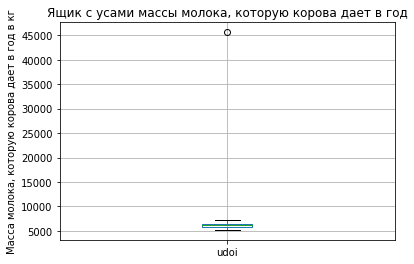

In [25]:
#построим ящик с усами массы молока в год
ferma.boxplot('udoi')
plt.title('Ящик с усами массы молока, которую корова дает в год')
plt.ylabel('Масса молока, которую корова дает в год в кг')
plt.show()

По графикам и описальной статистике видно, что у данного признака есть выброс, это максимальное значение удоя - 45616 кг. Удалим выброс и построим графики и описательную статистику снова.

In [26]:
#удалим выброс массы молока в год
ferma = ferma[ferma['udoi'] < 10000]

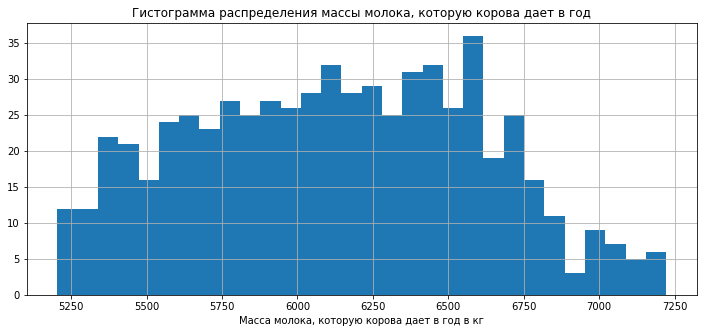

In [27]:
#построим гистограмму распределения массы молока в год после удаления выброса
ferma['udoi'].hist(bins=30, figsize=(12,5))
plt.title('Гистограмма распределения массы молока, которую корова дает в год')
plt.xlabel('Масса молока, которую корова дает в год в кг')
plt.show()

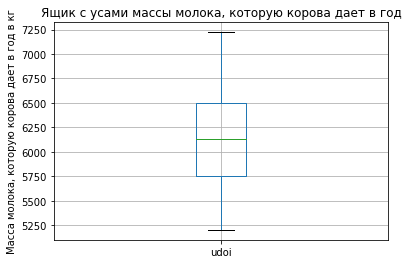

In [28]:
#построим ящик с усами массы молока в год
ferma.boxplot('udoi')
plt.title('Ящик с усами массы молока, которую корова дает в год')
plt.ylabel('Масса молока, которую корова дает в год в кг')
plt.show()

In [29]:
#выведем описательную статистику массы молока в год
ferma['udoi'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: udoi, dtype: float64

Гистограмма распределения признака Удой похожа на нормальное, среднее значение составляет 6126 кг, медиана - 6132,5 кг, значения очень близки друг к другу, максимальное значение удоя составляет 7222 кг, а минимальное 5204 кг.

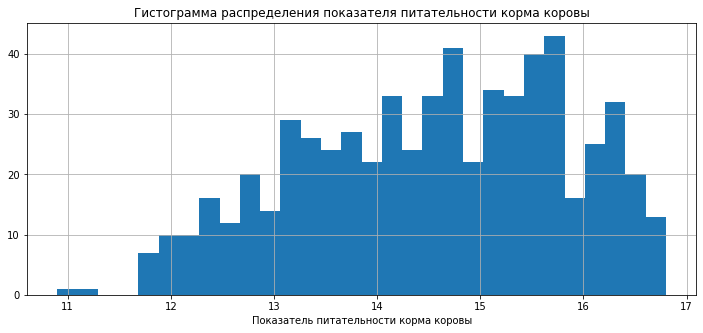

In [30]:
#построим гистограмму распределения показателя питательности корма коровы
ferma['eke'].hist(bins=30, figsize=(12,5))
plt.title('Гистограмма распределения показателя питательности корма коровы')
plt.xlabel('Показатель питательности корма коровы')
plt.show()

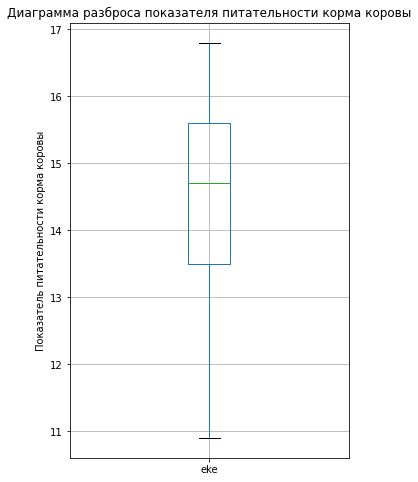

In [31]:
#построим диаграмму разброса показателя питательности корма коровы
ferma.boxplot('eke', figsize=(5,8))
plt.title('Диаграмма разброса показателя питательности корма коровы')
plt.ylabel('Показатель питательности корма коровы')
plt.show()

In [32]:
#выведем описательную статистику показателя питательности корма коровы
ferma['eke'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: eke, dtype: float64

Гистограмма показателя питательности корма коровы (ЭКЕ) немного похожа на нормальное распределение. Выбросов у данного признака нет, что видно как на графиках, так и в описательной статистике - среднее (14,55) и медиана (14,7) практически равны. Минимальное значение параметра - 10,9, максимальное 16,8.

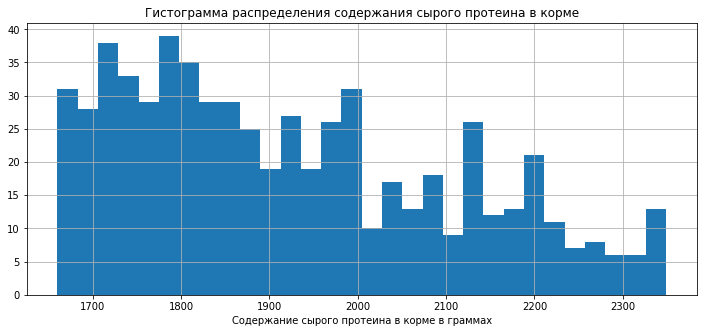

In [33]:
#построим гистограмму распределения содержания сырого протеина в корме
ferma['crude_protein'].hist(bins=30, figsize=(12,5))
plt.title('Гистограмма распределения содержания сырого протеина в корме')
plt.xlabel('Содержание сырого протеина в корме в граммах')
plt.show()

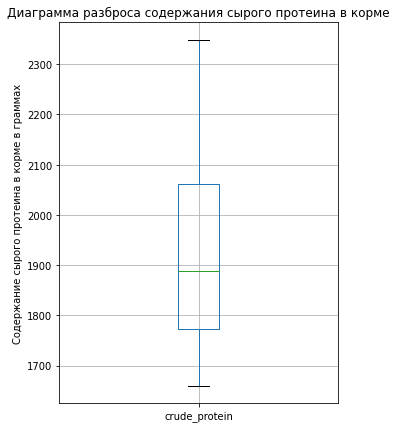

In [34]:
#построим диаграмму разброса содержания сырого протеина в корме 
ferma.boxplot('crude_protein', figsize=(5,7))
plt.title('Диаграмма разброса содержания сырого протеина в корме')
plt.ylabel('Содержание сырого протеина в корме в граммах')
plt.show()

In [35]:
#выведем описательную статистику содержания сырого протеина в корме
ferma['crude_protein'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein, dtype: float64

Гистограмма распределения содержания сырого протеина в корме смещено относительно центра. По ящику с усами можем сказать, что выбросов нет. Из описательной статистики видно, что минимальное значение содержания сырого протеина в корме - 1660 грамм, максимальное - 2349 грамм, среднее арифмтическое - 1924 грамма, а медиана - 1888 граммов.

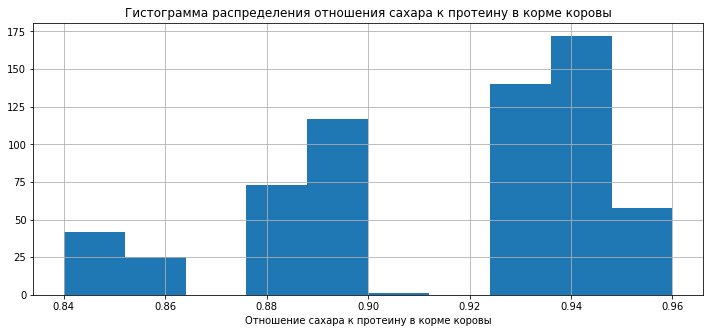

In [36]:
#построим гистограмму распределения отношения сахара к протеину в корме коровы
ferma['spo'].hist(bins=10, figsize=(12,5))
plt.title('Гистограмма распределения отношения сахара к протеину в корме коровы')
plt.xlabel('Отношение сахара к протеину в корме коровы')
plt.show()

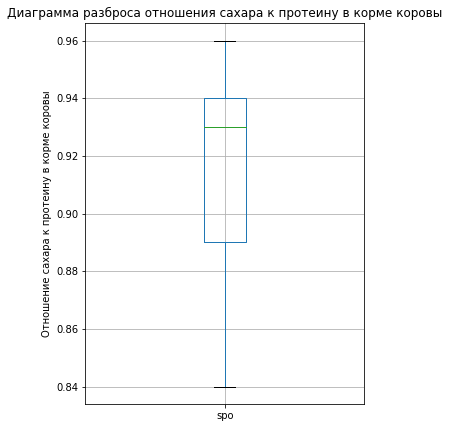

In [37]:
#построим диаграмму разброса отношения сахара к протеину в корме коровы
ferma.boxplot('spo', figsize=(5,7))
plt.title('Диаграмма разброса отношения сахара к протеину в корме коровы')
plt.ylabel('Отношение сахара к протеину в корме коровы')
plt.show()

In [38]:
#выведем описательную статистику отношения сахара к протеину в корме коровы
ferma['spo'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spo, dtype: float64

Гистограмма распределения отношения сахара к протеину в корме коровы неравномерная. По диаграмме размаха можно сказать, что выбросов нет, значения лежат в пределах от 0,84 до 0,96. Среднее данного параметра - 0,91, медиана - 0,93.

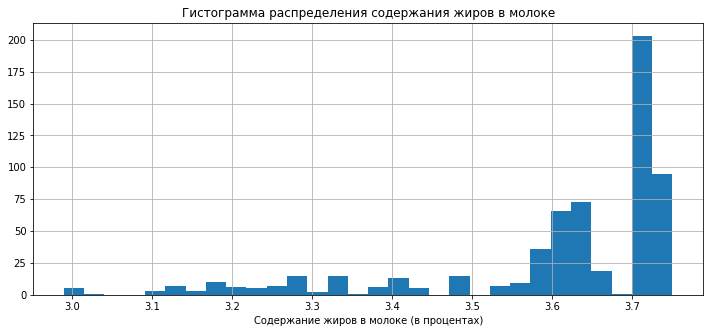

In [39]:
#построим гистограмму распределения содержания жиров в молоке
ferma['fat_content'].hist(bins=30, figsize=(12,5))
plt.title('Гистограмма распределения содержания жиров в молоке')
plt.xlabel('Содержание жиров в молоке (в процентах)')
plt.show()

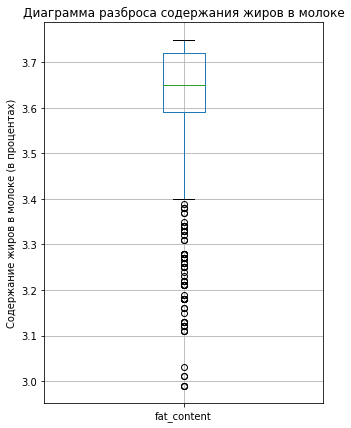

In [40]:
#построим диаграмму разброса содержания жиров в молоке
ferma.boxplot('fat_content', figsize=(5,7))
plt.title('Диаграмма разброса содержания жиров в молоке')
plt.ylabel('Содержание жиров в молоке (в процентах)')
plt.show()

In [41]:
#выведем описательную статистику содержания жиров в молоке
ferma['fat_content'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

Гистограмма распределения содержания жиров в молоке не похоже на нормальное. Все значения, меньше 3,4 % содержания жира в молоке, являются выбросами. Значения содержания жира в молоке лежат в пределах от 2,99 % до 3,75%. Среднее сожержание жира в молоке - 3,6 %, медиана - 3,65%. 

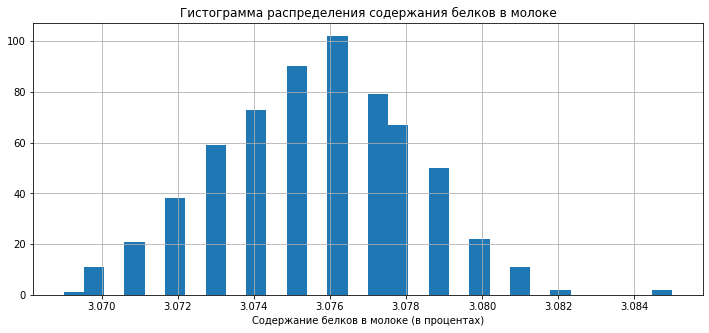

In [42]:
#построим гистограмму распределения содержания белков в молоке
ferma['protein'].hist(bins=30, figsize=(12,5))
plt.title('Гистограмма распределения содержания белков в молоке')
plt.xlabel('Содержание белков в молоке (в процентах)')
plt.show()

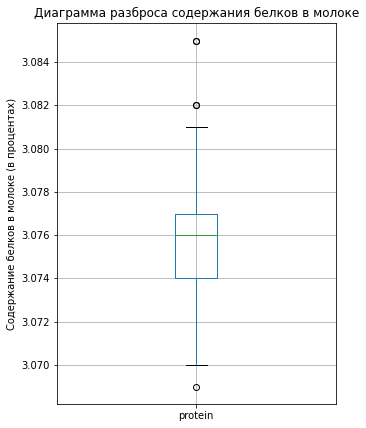

In [43]:
#построим диаграмму разброса содержания белков в молоке
ferma.boxplot('protein', figsize=(5,7))
plt.title('Диаграмма разброса содержания белков в молоке')
plt.ylabel('Содержание белков в молоке (в процентах)')
plt.show()

In [44]:
#выведем описательную статистику содержания белков в молоке
ferma['protein'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

Гистограмма распределения содержания белков в молоке является нормальным распредением. По диаграмме размаха видно, что есть несколько выбросов, но они не влияют на равные значения среднего (3,076%) и медианы (3,076%), максимальное значение содержания белков в молоке - 3,085%, минимальное - 3,059%.

Статистический анализ количественных показателей проведен, проведем и для категориальных показателей.

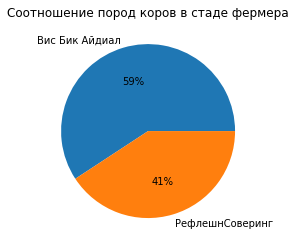

In [45]:
#построим круговую диаграмму соотношения пород коров в стаде фермера
ferma['breed'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение пород коров в стаде фермера',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

В стаде фермера больше коров породы Вис Бик Айдиал, их 59% всех коров, 41% всех коров - это коровы породы РефлешнСоверинг.

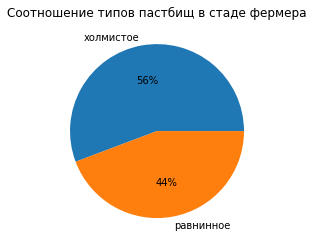

In [46]:
#построим круговую диаграмму типов пастбищ в стаде фермера
ferma['pasture'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение типов пастбищ в стаде фермера',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

У фермера на данный момент немного больше холмстых пастбищ, их 56%, 44% всей территории фермера занимают равнинные пастбища.

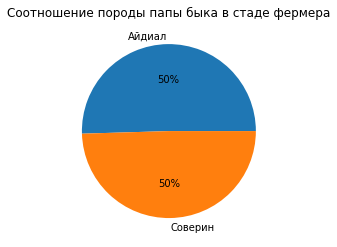

In [47]:
#построим круговую диаграмму породы папы быка в стаде фермера
ferma['breed_dad'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение породы папы быка в стаде фермера',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

В стаде фермера одинаковое количество с папами породы Айдиал и Соверин, ровно 50 % и той и другой породы.

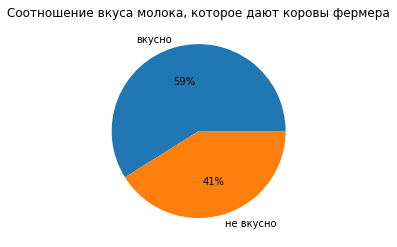

In [48]:
#построим круговую диаграмму вкуса молока, которое дают коровы фермера
ferma['taste'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение вкуса молока, которое дают коровы фермера',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

Судя по круговой диаграмме у фермера больше коров, которые дают вкусное молоко (59% всего молока) по личным критериям фермера, чем коров,которые дают невкусное молоко (41% всего молока).

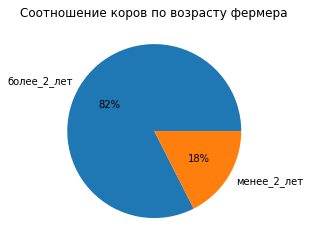

In [49]:
#построим круговую диаграмму соотношения возраста коров фермера
ferma['age'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение коров по возрасту фермера',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

У фермера не очень много молодых коров, возраст которых менее 2 лет, всего 18% всех коров. Остальные 82% всех коров - это коровы, которым более 2 лет.

Проведя исследовательский анализ данных можно сказать, что не все количественные признаки распределены нормально. Нормальное распределение имеют признаки: Удой, ЭКЕ, содержания белков. Распределения остальных признаков сложно назвать нормальным.

## Корреляционный анализ

Изучим взаимосвязь между всеми признаками, вычислим коэффициенты корреляции Спирмана или Phik  между всеми признаками, так как не все признаки распределены нормально, и построим тепловую карту по полученной таблице для наглядности.

In [50]:
#рассчитаем коэффициенты корреляции Пирсона методом corr()
ferma.corr()

,id,udoi,eke,crude_protein,spo,fat_content,protein
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
udoi,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
eke,-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
crude_protein,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
spo,-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat_content,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


In [51]:
!pip install phik -q
import phik
cor = ferma.phik_matrix(interval_cols=['udoi','eke','crude_protein','spo','fat_content', 'protein'])
cor

,id,udoi,eke,crude_protein,spo,breed,pasture,breed_dad,fat_content,protein,taste,age
id,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
udoi,1.0,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101
eke,1.0,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
crude_protein,1.0,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685
spo,1.0,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
breed,1.0,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
pasture,1.0,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
breed_dad,1.0,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
fat_content,1.0,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
protein,1.0,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000


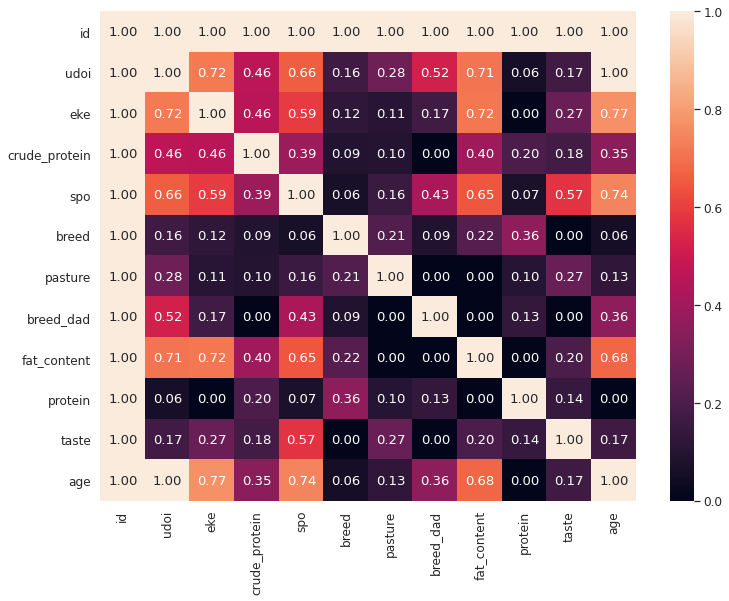

In [52]:
#построим тепловую карту коэффициентов phik
sns.set(font_scale=1.1)
plt.figure(figsize=(12,9))
sns.heatmap(cor, annot=True, fmt='.2f') 
plt.show()

Анализируя тепловую карту, можем сказать о наличии сильной связи между признаком Удой и ЭКЕ, коэффициент корреляции Phik для этих признаков составляет 0,72. Так же сильная линейная зависимость прослеживается между признаками Удой и Жирность - коэффициент крреляции составляет 0,71, и между признаками ЭКЕ и Жирность - 0,72, Жирность и Возраст - 0,77, СПО и Возраст - 0,74. Заметная зависимость присутствует между признаками Удой и СПО - 0,66, Удой и порода папы быка - 0,52, ЭКЕ и СПО - 0,59, СПО и Жирность - 0,65, СПО и Вкус - 0,57, Жирность и Возраст - 0,68. Умеренная связь есть между признаком Сырой протеин и Удой (0,46), ЭКЕ (0,46), СПО (0,39), Жирность (0,4) и Возраст(0,35). Так же умеренна связь наблюдается между признаками СПО и Порода папы быка - 0,43, Породой и Количеством белка в корме - 0,36, Породойй папы быка и Возрастом - 0,36. Между остальными признаками связь либо слабая либо отсутствует вовсе. 

Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

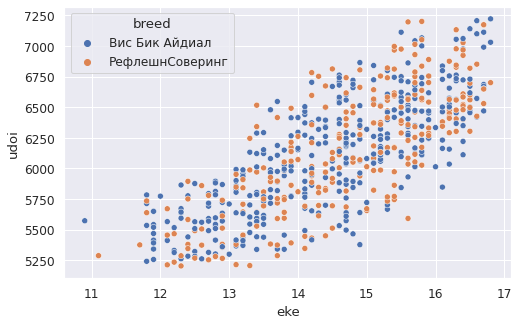

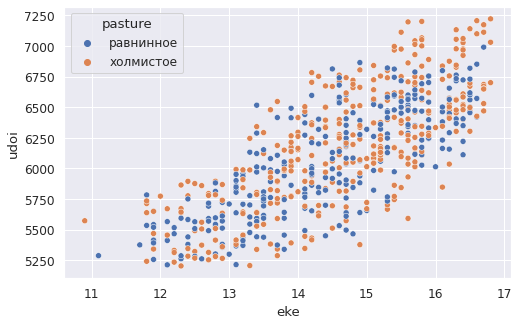

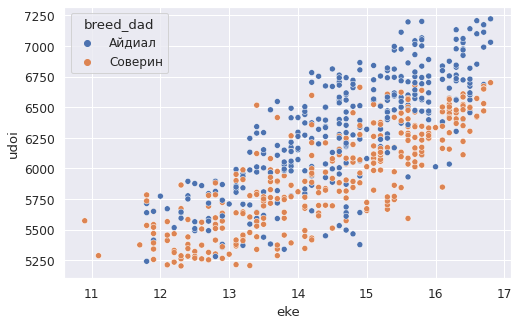

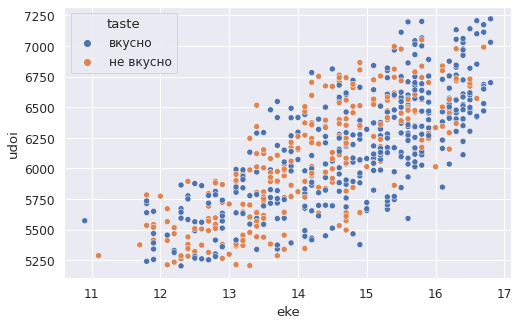

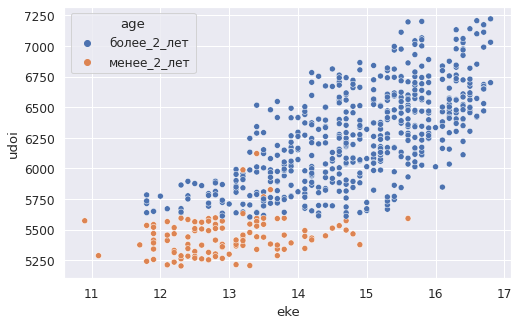

In [53]:
# построим диаграмму рассеяния для признака Удой и признака ЭКЕ с учетом породы коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='eke', y='udoi', hue='breed')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака ЭКЕ с учетом типа пастбища
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='eke', y='udoi', hue='pasture')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака ЭКЕ с учетом породы папы быка
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='eke', y='udoi', hue='breed_dad')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака ЭКЕ с учетом вкуса молока
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='eke', y='udoi', hue='taste')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака ЭКЕ с учетом возраста коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='eke', y='udoi', hue='age')
plt.show()

Диаграмма рассеяния между целевым признаком Удой и входным признаком ЭКЕ подтверждает значения тепловой карты - сильная линейная связь. По качественным характеристикам можем сказать, что порода не влияет ни на количество молока, которое дает корова в год,ни на пооказатель питательности корма коровы, тип пастбища тоже никак не отражается на значении удоя, так же как и вкус молока. Коровы с породой папы быка Айдиал дают немного больше молока в год, чем коровы с породой папы быка Соверин, на показатель питательности порода папы быка никак не влият. По диаграмме рассеяния видно, что молодые коровы дают меньше молока в год и это молоко менее питательное.

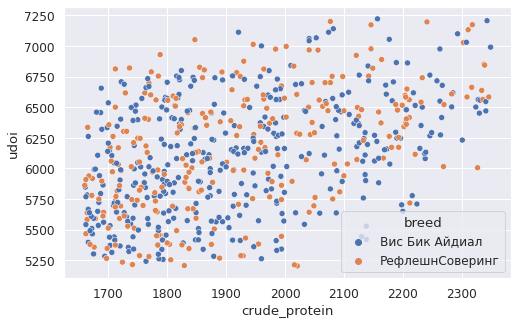

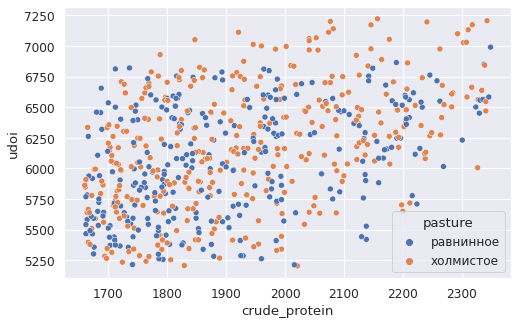

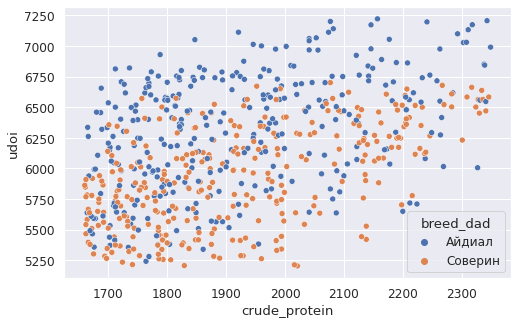

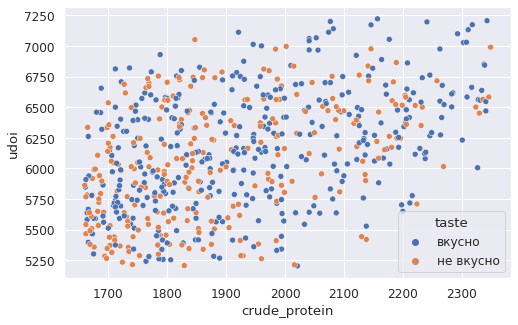

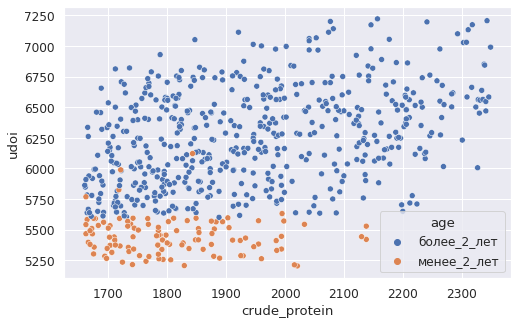

In [54]:
# построим диаграмму рассеяния для признака Удой и признака Сырой протеин с учетом породы коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='crude_protein', y='udoi', hue='breed')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Сырой протеин с учетом типа пастбища
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='crude_protein', y='udoi', hue='pasture')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Сырой протеин с учетом породы папы быка
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='crude_protein', y='udoi', hue='breed_dad')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Сырой протеин с учетом вкуса молока
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='crude_protein', y='udoi', hue='taste')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Сырой протеин с учетом возраста коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='crude_protein', y='udoi', hue='age')
plt.show()

По диаграмма рассеяния между целевым признаком Удой и входным признаком Сырой протеин можно сказать, что связь есть, но она не  сильная, что подтверждает значения тепловой карты. Порода не влияет ни на количество молока, которое дает корова в год,ни на показатель содержания сырого протеина в корме, так же как и тип пастбища и вкус молока. Коровы с породой папы быка Айдиал дают немного больше молока в год, чем коровы с породой папы быка Соверин, но на показатель содержания сырого протеина в корме порода папы быка никак не влият. По диаграмме рассеяния видно, что молодые коровы дают меньше молока в год и это молоко содержит меньше сырого белка.

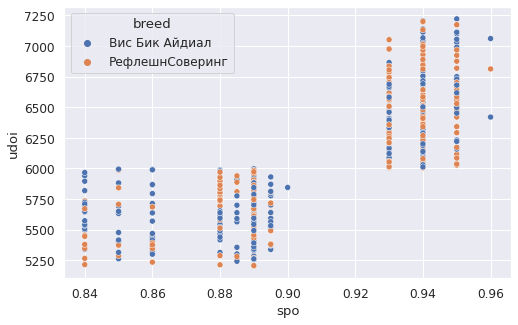

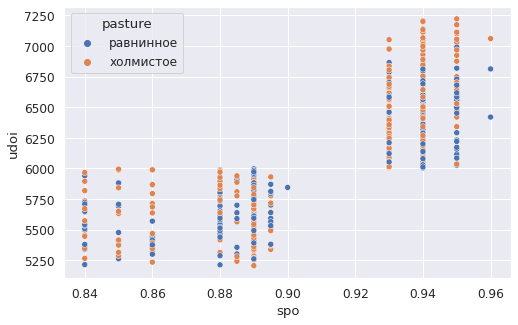

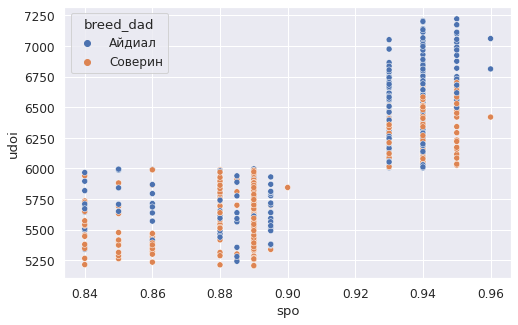

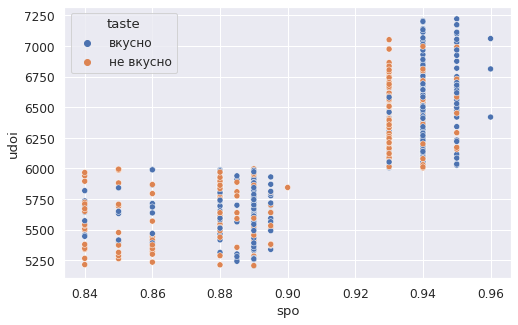

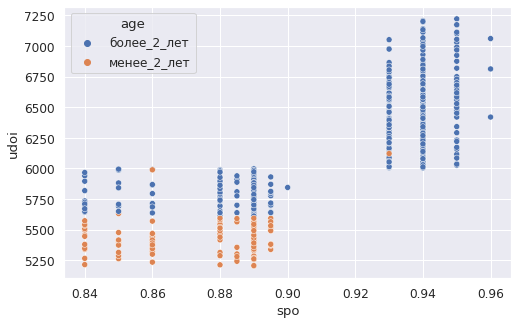

In [55]:
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом породы коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='spo', y='udoi', hue='breed')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом типа пастбища
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='spo', y='udoi', hue='pasture')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом породы папы быка
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='spo', y='udoi', hue='breed_dad')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом вкуса молока
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='spo', y='udoi', hue='taste')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом возраста коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='spo', y='udoi', hue='age')
plt.show()

По СПО на графике видно постоянную нелинейную зависимость на разных уровнях. В рамках этих двух групп значения разбросы по всему диапазону. Порода коровы никак не отражается ни на количестве молока, которое корова дает в год, ни на отношении сахара к протеину в корме коровы. Коровы, которые пасутся на холмах и едят корм, с большим отношение сахара к белку, дают больше молока в год. Коровы, у которых порада папы быка Айдиал, и которые так же едят корм, с большим отношение сахара к белку, дают больше молока в год. Молодые коровы дают меньше молока, корм на это не влияет.

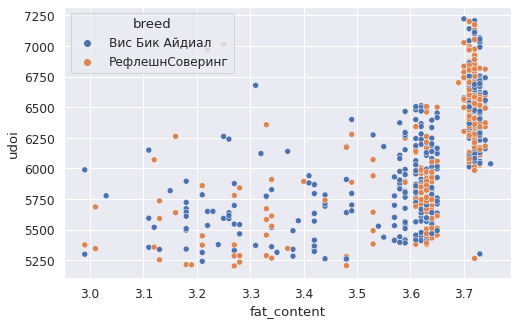

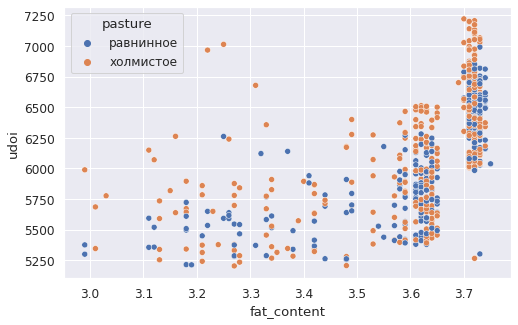

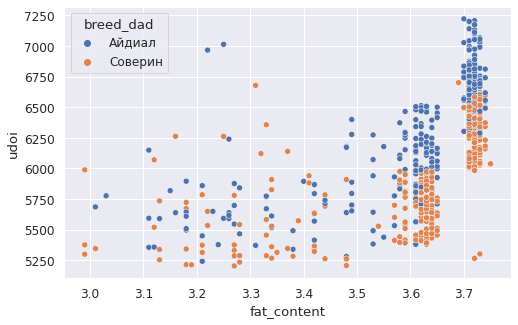

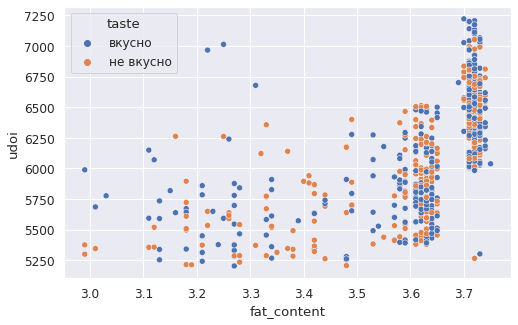

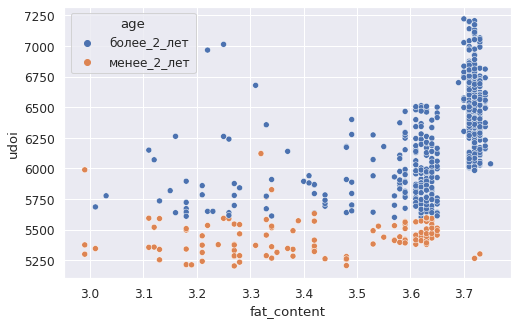

In [56]:
# построим диаграмму рассеяния для признака Удой и признака Жирность с учетом породы коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='fat_content', y='udoi', hue='breed')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Жирность с учетом типа пастбища
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='fat_content', y='udoi', hue='pasture')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Жирность с учетом породы папы быка
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='fat_content', y='udoi', hue='breed_dad')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Жирность с учетом вкуса молока
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='fat_content', y='udoi', hue='taste')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака Жирность с учетом возраста коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='fat_content', y='udoi', hue='age')
plt.show()

По диаграмма рассеяния между целевым признаком Удой и входным признаком Жирность можно сказать, что связь есть, но эта связь не сильно похожа на прямую, хотя значения тепловой карты говорят нам о заметной линейной связь между признаками. Порода коровы и вкус молока не влияют ни на количество молока, которое дает корова в год,ни на показатель содержания жиров в молоке. Коровы, которые пасутся на холпистой местности дают больше молока с жирного молока. Коровы с породой папы быка Айдиал дают немного больше молока в год, чем коровы с породой папы быка Соверин, но на показатель содержания жиров в молоке порода папы быка никак не влият. По диаграмме рассеяния видно, что молодые коровы дают меньше молока в год и это молоко содержит меньше жиров.

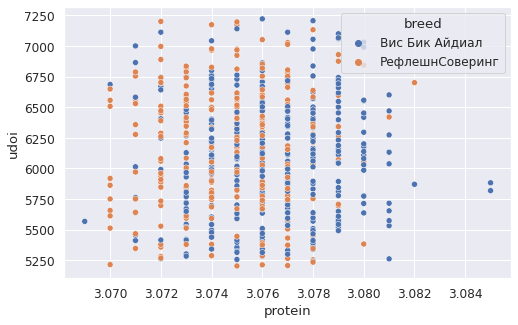

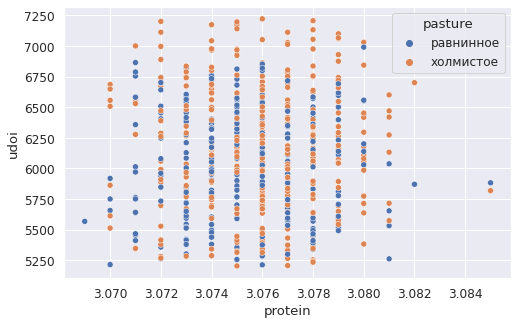

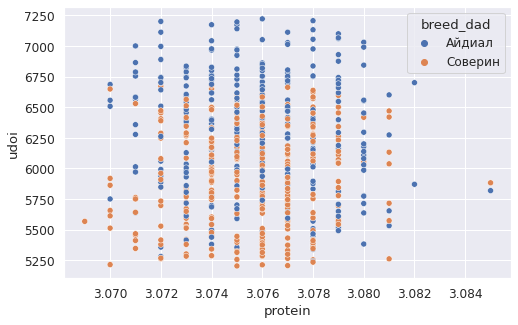

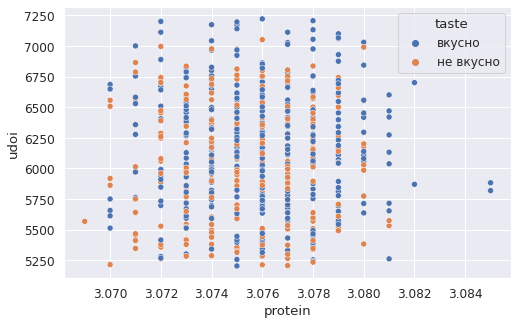

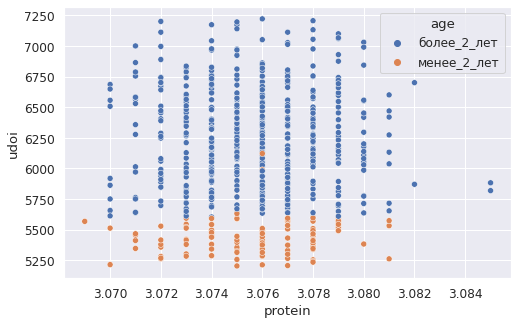

In [57]:
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом породы коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='protein', y='udoi', hue='breed')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом типа пастбища
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='protein', y='udoi', hue='pasture')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом породы папы быка
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='protein', y='udoi', hue='breed_dad')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом вкуса молока
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='protein', y='udoi', hue='taste')
plt.show()
# построим диаграмму рассеяния для признака Удой и признака СПО с учетом возраста коров
plt.figure(figsize=(8,5))
sns.scatterplot(data=ferma, x='protein', y='udoi', hue='age')
plt.show()

По диаграммам рассеяния между Удоем и содержание белков в молоке видно, что связи между этими параметрами нет. Так же не наблюдаем связи между категориальными признаками и удоем и содержанием белков в молоке, кроме категориального признака возраста коровы, молодые коровы дают меньше молока и в нем меньшее содержание белков.

Проведя корреляционный анализ можем сказать, что сильная нелинейная связь наблюдается между Удоем и ЭКЕ - 0,72 по коэффициенту  phik, диаграмма рассеяния выглядит как кривое облако - следовательно квадратичная зависимость. По диаграмме рассеяния можно сказать , что между признаками Удой и Сырой протеин слабая связь, хотя на тепловой карте связь умереная - 0,46.Между признаками СПО и Удой, судя по тепловой карте, наблюдается заметная связь - 0,66, по диаграмме рассеяния можно сказать, что наблюдается тенденция к кластеризации. Между Удоем и Жирностью молока коэффициент корреляции равен 0,71, по диаграмме рассеяния можем сказать что связь нелинейная. По диаграммам рассеяния между Удоем и содержание белков в молоке видно, что связи между этими параметрами нет, посчитанный коэффициент phik это подтверждает, он равен 0,06. Мультиколлинеарности между входными признаками не наблюдается.

## Обучение модели линейной регрессии

#### Первая модель простой линейной регрессии

Модель линейной регресии работает только с количественными признаками и для задачи линейной регрессии необходимо, чтобы между целевым и входными признаками была линейная связь. Целевой признак, который нам нужно будет предсказать - Удой, количество молока, которое корова дает за год напрямую зависит от того, какой корм ест корова, то есть от показателя питательности корма коровы, от содержания сырого протеина в корме и от отношения сахара к протеину в корме коровы. Порода, Тип пастбища, на котором пасется корова, Порода папы быка и возраст этой коровы так же напрямую влияют на количество молока, которое она дает в год, но эти признаки категориальные, поэтому их нужно будет закодировать. ЭКЕ, СПО, Сырой протеин, Порода, Тип пастбища, Порода папы быка и возраст коровы - это наши входные признаки. Разделим наш датасет на тренировочную и тестовую выборки.

In [58]:
# создание входных и целевого признаков
X = ferma.drop({'id', 'udoi', 'fat_content', 'protein', 'taste'}, axis=1)
y = ferma['udoi']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

Закодируем категориальные признаки с помощью OneHotEncoder.

In [59]:
# список категориальных признаков 
cat_col_names = ['breed', 'pasture', 'breed_dad', 'age']

# создание переменной с экземпляром класса OneHotEncoder()
# включим параметр для избегания появления дамми-ошибок,
# отключим sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names()

Отмасштабируем количественные признаки с помощью StandardScaler.

In [60]:
# список количественных признаков
num_col_names = ['eke', 'crude_protein', 'spo']

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

In [61]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведем первые пять строчек закодированной и отмасштабированной тренировочной выборки
X_train.head()

,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,eke,crude_protein,spo
0,1.0,1.0,1.0,0.0,1.502378,1.079523,0.837130
1,1.0,1.0,1.0,1.0,-1.557270,-0.196920,-0.703660
2,0.0,0.0,0.0,0.0,0.125537,-1.386085,-1.011818
3,0.0,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0.0,0.0,0.0,0.0,-1.098323,0.828598,-0.703660


Обучим модель линейной регрессии на подготовленных данных.

In [62]:
# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

Рассчитаем коэффициент детерминации R². Коэффициент детерминации оценивает обобщающую способность модели. Это значит, что он определяет, насколько хорошо модель «объясняет», предсказывает целевой признак по входным. Положительные значения R² показывают, в скольких процентах случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Отрицательный R² означает, что средние значения всегда лучше прогнозных.

In [63]:
# рассчитаем значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions) 

# выведем полученное значение R2
r2

0.7844078173416967

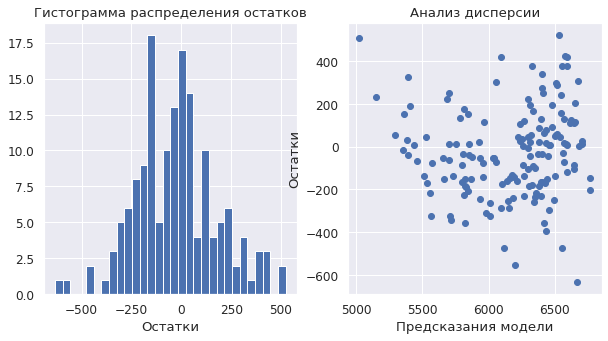

In [64]:
# проведем анализ остатков
# перед этим рассчитаем остатки
residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [65]:
# получение значения MSE
mse = mean_squared_error(y_test, predictions) 
mse

43887.015009660514

In [66]:
# получение значения RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

209.4922791170608

In [67]:
# получение значения МАЕ
mae = mean_absolute_error(y_test, predictions)
mae

164.24194463474925

Гистограмма распределения остатков показывает неравномерное распределение, близкое к нормальному. Коэффициент детерминации составляет 0,78, что является неплохим показателем. Метрика MSE для первой модели равна 43887,02 кг в квадрате, метрика RMSE равна 209,49 кг, а метрика MAE равна 164,24 кг. Дисперсия остатков не является постоянной по всему диапазону предсказанных значений, анализ остатков показывает, что модель есть куда улучшать. Возможно, нужно исключить нелинейность некоторых признаков, чтобы эти признаки были информативны для линейной регрессии, или добавить новые признаки в датафрейм. Обучим вторую модель линейной регрессии.

#### Вторая модель простой линейной регрессии

СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём значение 0,92 СПО можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.

In [68]:
# создадим функцию для категоризации значения СПО
def spo_group(spo):
    if spo < 0.920:
        return 'меньше 0,92'
    return 'больше 0,92'

In [69]:
# преобразуем столбец СПО в категориальный признак с помощью функции spo_group
ferma['spo_cat'] = ferma['spo'].apply(spo_group)
ferma.head()

,id,udoi,eke,crude_protein,spo,breed,pasture,breed_dad,fat_content,protein,taste,age,spo_cat
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,"меньше 0,92"
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,"меньше 0,92"
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,"меньше 0,92"
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,"меньше 0,92"
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,"меньше 0,92"


По диаграмме рассеивания для признаков ЭКЕ и Удой можно предположить, что эти эти признаки связаны нелинейно, едва заметно там прослеживается и квадратичная функция. Попробуем исключить нелинейность между ними, введем новый признак ЭКЕ в квадрате. 

In [70]:
# добавим новый столбец со значениями ЭКЕ в квадрате
ferma['eke_2'] = ferma['eke'] **2
ferma.head()

,id,udoi,eke,crude_protein,spo,breed,pasture,breed_dad,fat_content,protein,taste,age,spo_cat,eke_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,"меньше 0,92",201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,"меньше 0,92",163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,"меньше 0,92",196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,"меньше 0,92",153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,"меньше 0,92",163.84


Подготовим данные, обучим модель линейной регрессии и найдем метрики для этой модели.

In [71]:
# создание входных и целевого признаков
X = ferma.drop({'id', 'udoi', 'fat_content', 'protein', 'taste', 'eke', 'spo'}, axis=1)
y = ferma['udoi']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

In [72]:
# список категориальных признаков 
cat_col_names = ['breed', 'pasture', 'breed_dad', 'age', 'spo_cat']

# создание переменной с экземпляром класса OneHotEncoder()
# включим параметр для избегания появления дамми-ошибок,
# отключим sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names()

# список количественных признаков
num_col_names = ['eke_2', 'crude_protein']

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# рассчитаем значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions) 

# выведем полученное значение R2
r2

0.8180879926867501

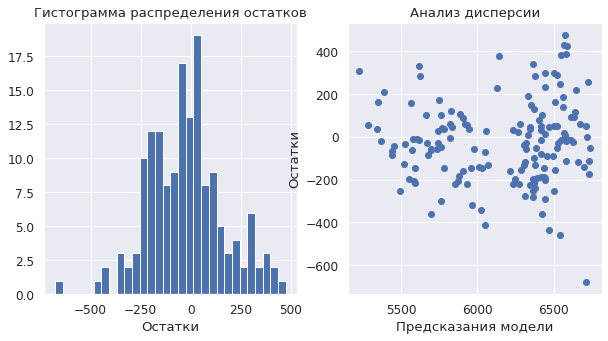

In [73]:
# проведем анализ остатков
# перед этим рассчитаем остатки
residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [74]:
# получение значения MSE
mse = mean_squared_error(y_test, predictions) 
mse

37030.91131113695

In [75]:
# получение значения RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

192.43417396901452

In [76]:
# получение значения МАЕ
mae = mean_absolute_error(y_test, predictions)
mae

149.03965222364604

Гистограмма распределения остатков показывает неравномерное распределение, близкое к нормальному. Коэффициент детерминации составляет 0,82, это лучше, чем у первой модели (0,78). Метрика MSE равна 37030,91 кг в квадрате, это меньше чем у первой модели (43887,02 кг в квадрате). Метрика RMSE равна 192, 43 кг против RMSE первой модели, равной 209,49 кг, метрика MAE также меньше метрики MAE первой модели(164,24 кг) и равна 149,04 кг. График дисперсии остатков второй модели выглядит более равномерным, но по-прежнему не является постоянным по всему диапазону предсказанных значений. Вторая модель предсказывает лучше, чем первая. Попробуем добавить новый признак и обучить третью модель линейной регрессии.

#### Третья модель простой линейной регрессии

Объединим датафреймы ferma и dads и обучим третью модель линейной регрессии.

In [77]:
# объединим датафреймы ferma и dads
ferma_dads = ferma.merge(dads, on='id', how='inner')
ferma_dads.head()

,id,udoi,eke,crude_protein,spo,breed,pasture,breed_dad,fat_content,protein,taste,age,spo_cat,eke_2,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,"меньше 0,92",201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,"меньше 0,92",163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,"меньше 0,92",196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,"меньше 0,92",153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,"меньше 0,92",163.84,Барин


In [78]:
# создание входных и целевого признаков
X = ferma_dads.drop({'id', 'udoi', 'fat_content', 'protein', 'taste', 'eke', 'spo'}, axis=1)
y = ferma_dads['udoi']

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [79]:
# список категориальных признаков 
cat_col_names = ['breed', 'pasture', 'breed_dad', 'age', 'spo_cat', 'dad_name']

# создание переменной с экземпляром класса OneHotEncoder()
# включим параметр для избегания появления дамми-ошибок,
# отключим sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names()

# список количественных признаков
num_col_names = ['eke_2', 'crude_protein']

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# рассчитаем значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions) 

# выведем полученное значение R2
r2

0.8247542745210408

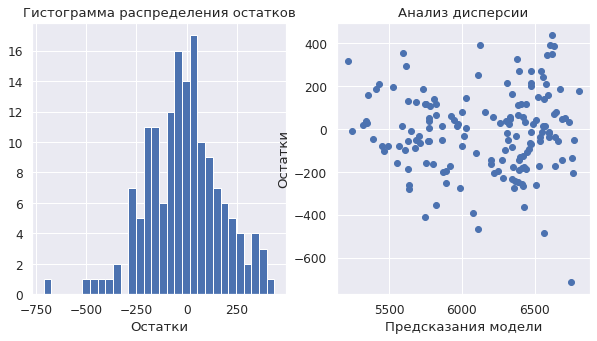

In [80]:
# проведем анализ остатков
# перед этим рассчитаем остатки
residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [81]:
# получение значения MSE
mse = mean_squared_error(y_test, predictions) 
mse

35673.88988618191

In [82]:
# получение значения RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

188.8753289505591

In [83]:
# получение значения МАЕ
mae = mean_absolute_error(y_test, predictions)
mae

146.16302445362308

Гистограмма распределения остатков показывает неравномерное распределение, близкое к нормальному. Коэффициент детерминации составляет 0,82, такой же, как и у второй модели. Метрика MSE равна 35673,89 кг в квадрате, это немного меньше, чем у второй модели (37030,91 кг в квадрате). Метрика RMSE тоже незначительно меньше, 188,88 кг, у второй модели RMSE равна 192, 43 кг. Метрика MAE для третьей модели равна 146,16 кг, у второй модели эта метрика принимала значение 149,04 кг. График дисперсии остатков третьей модели так же, как и для первых двух моделей, не является постоянным по всему диапазону предсказанных значений. Лучше всего работает третья модель линейной регрессии.

Рассчитаем доверительный интервал прогноза лучшей модели как интервал средних выборки, которые будут покрывать 95% случаев.

In [84]:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))

95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


#### Прогноз удоя коров

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Данные о них находятся в датафрейме cow_buy. Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Нам известно, что технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%. Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датафрейма ferma средние значения каждого из признаков и увеличим их на 5%.

In [85]:
cow_buy['eke'] = ferma['eke'].mean() * 1.05
cow_buy['crude_protein'] = ferma['crude_protein'].mean() * 1.05
cow_buy['spo'] = ferma['spo'].mean() * 1.05
cow_buy.head()

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,eke,crude_protein,spo
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [86]:
cow_buy['eke_2'] = cow_buy['eke'] ** 2
cow_buy['spo_cat'] = cow_buy['spo'].apply(spo_group)
cow_buy.head()

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,eke,crude_protein,spo,eke_2,spo_cat
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92"
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92"
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92"
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92"
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92"


In [87]:
# создание входных признаков в датафрейме cow_buy
X_pred = cow_buy.drop({'current_fat_content', 'current_protein', 'eke', 'spo'}, axis=1)

# выполним преобразование категориальных признаков в датафрейме cow_buy
X_pred_ohe = encoder.transform(X_pred[cat_col_names])

# выполним преобразование количественных признаков в датафрейме cow_buy
X_pred_scaled = scaler.transform(X_pred[num_col_names])

# создаём датафрейме cow_buy из закодированных и отмасштабированных данных
X_pred_ohe = pd.DataFrame(X_pred_ohe, columns=encoder_col_names)
X_pred_scaled = pd.DataFrame(X_pred_scaled, columns=num_col_names)

# объединяем все преобразованные данные в датафрейме cow_buy
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_pred = pd.concat([X_pred_ohe, X_pred_scaled], axis=1)

# предсказываем значения удоя коров в датафрейме cow_buy
predictions = model_lr.predict(X_pred)
cow_buy['udoi'] = predictions
cow_buy

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,eke,crude_protein,spo,eke_2,spo_cat,udoi
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6542.146066
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6425.380218
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6609.919297
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6571.259737
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6283.999775
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6400.540668


По прогнозу  удоя коров фермеру подходят все коровы, которые ему предлагает агенство. Перейдем к прогнозу вкуса молока.

## Обучение модели логистической регрессии

В задаче классификации целевой признак - вкус молока, бинарный признак. Вкус молока зависит питательности корма коровы, от содержания сырого протеина в корме, от отношения сахара к протеину в корме, от породы коровы, от пастбища, ка котором пасется корова, от породы папы быка, от возраста коровы, от содержания жиров в молоке и от содержания белков в молоке - это все входные признаки выборки. Разобьем данные на тренировочную и тестовую выборки. Закодируем категориальные признаки с помощью OneHotEncoder. Отмасштабируем количественные признаки с помощью StandardScaler. Обучим модель логистической регрессии на подготовленных данных. Рассчитаем метрики accuracy, recall, precision. Построим матрицу ошибок.

In [88]:
# создадим функцию для перевода в бинарный признак значения taste
def taste_bin(taste):
    if taste == 'вкусно':
        return 1
    return 0
ferma_dads['taste'] = ferma_dads['taste'].apply(taste_bin)  
ferma_dads.head()

,id,udoi,eke,crude_protein,spo,breed,pasture,breed_dad,fat_content,protein,taste,age,spo_cat,eke_2,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет,"меньше 0,92",201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет,"меньше 0,92",163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0,более_2_лет,"меньше 0,92",196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0,более_2_лет,"меньше 0,92",153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет,"меньше 0,92",163.84,Барин


In [89]:
# создание входных и целевого признаков
X = ferma_dads.drop({'id', 'udoi', 'taste', 'spo', 'eke_2'}, axis=1)
y = ferma_dads['taste']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# список категориальных признаков 
cat_col_names = ['breed', 'pasture', 'breed_dad', 'age', 'spo_cat', 'dad_name']

# создание переменной с экземпляром класса OneHotEncoder()
# включим параметр для избегания появления дамми-ошибок,
# отключим sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучим и трансформируем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# выполним преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names()

# список количественных признаков
num_col_names = ['eke', 'crude_protein', 'fat_content', 'protein']

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_trai[num_col_names]) 

# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)


# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
print('accuracy:', round(acc,2))

# находим метрики recall и precision
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('recall:', round(recall ,2))
print('precision: ',round(precision,2))

accuracy: 0.63
recall: 0.86
precision:  0.62


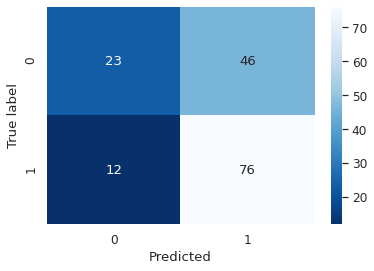

In [90]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Метрика *accuracy* показывает долю верных ответов модели, в нашем случае она равна 0,62. То есть в 62 % случаях модель верно предсказывает ответы.

Метрика *precision* показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Иными словами, *precision* определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0. Чем выше эта метрика, тем меньше таких случаев. В нашем случае, precision = 0.62, то есть в 62 % случаях модель выставляет класс 1 объектам класса 0. 

Метрика, обратная *precision* — *recall*. Она измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Предсказания False Negative рассматриваются метрикой как «неучтённые» True Positive. Чем выше *recall*, тем больше прогнозов Positive модель смогла дать верно. У нас получилось recall = 0,86, то есть 86 % прогнозов Positive модель смогла дать верно.

В нашем проекте критичнее всего ошибка первого рода, так как главное для заказчика — вкусное молоко. Метрика precision показывает, что в 38 % случаях невкусное молоко модель предсказывает как вкусное. Необходимо максимизировать precision.  Сведем критичную ошибку к нулю: для этого изменим порог принадлежности к классам. 

In [91]:
# выведем объекты по убыванию вероятности их принадлежности к классу
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head()

,y_test,y_proba
85,1,0.855938
51,1,0.842435
66,1,0.839110
110,1,0.835973
147,1,0.812666


Добавим пороги с помощью функции linspace: она разделит заданный промежуток на несколько более мелких. Посмотрим на то, как модель будет работать при 5 разных порогах.

In [92]:
thresholds = [round(i,2) for i in np.linspace(0.6,1,num = 5,endpoint=False)]
thresholds

[0.6, 0.68, 0.76, 0.84, 0.92]

In [93]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавляем столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
data.sample(10)

,y_test,y_proba,y_pred_0.6,y_pred_0.68,y_pred_0.76,y_pred_0.84,y_pred_0.92
11,1,0.768588,1,1,1,0,0
57,0,0.636879,1,0,0,0,0
54,0,0.787918,1,1,1,0,0
105,0,0.622170,1,0,0,0,0
78,0,0.620529,1,0,0,0,0
20,1,0.607155,1,0,0,0,0
52,1,0.588194,0,0,0,0,0
86,1,0.670038,1,0,0,0,0
63,0,0.576865,0,0,0,0,0
131,0,0.513120,0,0,0,0,0


Самое главное для нас, чтобы верно предсказывались нули, в таблице выше видно, что при пороге 0,68 не все нули предсказаны верно. а при значении 0,84 в таблице только нули. Значит нужный нам порог лежит в предалах от 0.68 до 0,84. Посчитаем recall и precision при 0,7 , 0,75 и 0,8. 

In [94]:
y_pred_70 = (y_proba >= 0.7).astype(int)
recall_70 = recall_score(y_test, y_pred_70)
precision_70 = precision_score(y_test, y_pred_70)

display(recall_70)
display(precision_70)

0.42045454545454547

0.8409090909090909

In [95]:
y_pred_75 = (y_proba >= 0.75).astype(int)
recall_75 = recall_score(y_test, y_pred_75)
precision_75 = precision_score(y_test, y_pred_75)

display(recall_75)
display(precision_75)

0.23863636363636365

0.875

In [96]:
y_pred_80 = (y_proba >= 0.8).astype(int)
recall_80 = recall_score(y_test, y_pred_80)
precision_80 = precision_score(y_test, y_pred_80)

display(recall_80)
display(precision_80)

0.07954545454545454

1.0

При пороге 0,8, precision равен 1. Попробуем взять порог немного меньше.

In [97]:
y_pred_78 = (y_proba >= 0.78).astype(int)
recall_78 = recall_score(y_test, y_pred_78)
precision_78 = precision_score(y_test, y_pred_78)

display(recall_78)
display(precision_78)

0.13636363636363635

0.8

In [98]:
y_pred_79 = (y_proba >= 0.79).astype(int)
recall_79 = recall_score(y_test, y_pred_79)
precision_79 = precision_score(y_test, y_pred_79)

display(recall_79)
display(precision_79)

0.11363636363636363

0.9090909090909091

Порог, равный 0,8 - первое значение, при котором precision равен 1.

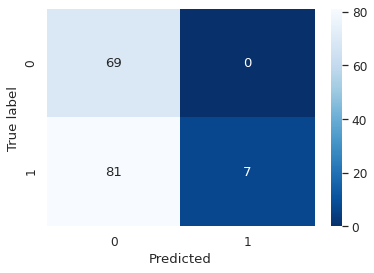

In [99]:
cm = confusion_matrix(y_test, y_pred_80)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Мы уменьшили ошибку первого рода, но теперь в восьмидесяти случаях наша модель ошибается по поводу вкусного молока, она предсказывает его как невкусное. 

#### Предсказание вкуса молока

In [100]:
# создание входных признаков в датафрейме cow_buy
X_pred = cow_buy.drop({'udoi', 'spo', 'eke_2'}, axis=1)

# список категориальных признаков 
cat_col_names = ['breed', 'pasture', 'breed_dad', 'age', 'spo_cat', 'dad_name']

# трансформируем категориальные признаки из датафрейма cow_buy
X_pred_ohe = encoder.transform(X_pred[cat_col_names])

# получим от кодировщика список новых столбцов и сохраним в новой переменной 
encoder_col_names = encoder.get_feature_names()

# список количественных признаков
num_col_names = ['eke', 'crude_protein', 'current_fat_content', 'current_protein']

# трансформируем количественные признаки из датафрейма cow_buy 
X_pred_scaled = scaler.transform(X_pred[num_col_names])

# создаём датафрейм из закодированных и отмасштабированных данных
X_pred_ohe = pd.DataFrame(X_pred_ohe, columns=encoder_col_names)

X_pred_scaled = pd.DataFrame(X_pred_scaled, columns=num_col_names)

# объединяем все преобразованные данные в общий датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_pred = pd.concat([X_pred_ohe, X_pred_scaled], axis=1)

# получаем прогноз
y_proba = clf.predict_proba(X_pred)[:,1]
y_pred = (y_proba >= 0.79).astype(int)

# записываем спрогнозированные значения в столбец taste датафрейма cow_buy и выводим датафрейм на экран
cow_buy['taste'] = y_pred
cow_buy


,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,eke,crude_protein,spo,eke_2,spo_cat,udoi,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6609.919297,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6378.711028,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6283.999775,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6593.089377,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6542.146066,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6425.380218,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6609.919297,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6571.259737,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6283.999775,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,"больше 0,92",6400.540668,0


## Итоговые выводы

Выведем датафрейм с прогнозами по коровам, которые хочет купить фермер, на экран, удалив некоторые столбцы для наглядности.

In [101]:
cow_buy = cow_buy.drop({'eke', 'crude_protein', 'spo', 'eke_2', 'spo_cat'}, axis=1)
cow_buy

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,udoi,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.380218,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,0


In [102]:
#вернем значению вкуса молока вкусно-не вкусно
def taste_milk(taste):
    if taste == 1:
        return 'вкусно'
    return 'не вкусно'
cow_buy['taste'] = cow_buy['taste'].apply(taste_milk)
cow_buy

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,udoi,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.380218,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,не вкусно


Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [103]:
cow_buy_recomend = cow_buy.query('taste == "вкусно" & udoi > 6000')
cow_buy_recomend

,breed,pasture,breed_dad,dad_name,current_fat_content,current_protein,age,udoi,taste


По прогнозу вкуса молока нашей модели ни одна из коров из ассоциации пастбищ «ЭкоФерма» не будет давать вкусное молоко, а так как для фермера важнее всего именно вкус молока, то ни одна из коров не рекомендуется к покупке.

В данном исследовании мы использовали такие методы улучшения работы модели как устранение нелинейности метод возведения в квадрат одного из признаков, а так же добавление новых признаков. Эти методы помогли нам улучшить работу модели и соответственно ее предсказания сделать более точными. 

Для логистической регрессии мы увеличили порог классификачии, чтобы модель точнее предсказывала вкусное молоко. 
При оценке работы моделей логистической регресии важны метрики recall и precision. Если мы будем знать какой класс выгоднее предсказать или какой ошибки лучше избегать, то можем с помощью подбора порога классификации настроить модель под наши цели.

Наша модель логистической регрессии имеет низкое качество, возможно из-за этого к покупке не было рекомендована ни одна из коров. Возможно нам не хватает входящих признаков для лучшей работы модели. необходимо запросить признаку у фермера.

При работе линейной регрессии важны все метрики, но для каждой задачи подходят определенные метрики, например, MSE показывает, на какое значение в среднем предсказание отличается от истинного значения, но измеряется в квадратных единицах целевого признака, из-за этого её сложно интерпретировать. Метрика RMSE так же показывает, на какое значение в среднем предсказание отличается от истинного значения, измеряется в единицах целевого признака, поэтому его легче интерпретировать, чем MSE. Метрика МАЕ очень похожа и по смыслу и по значению на метрику RMSE. Коэффициент детерминации R² Показывает, в скольких процентах случаев предсказание модели точнее, чем среднее значение целевого признака.